Lecture plan:
1. Linear Regression training, Loss functions.
2. Gradient descent and Stochastic Gradient Descent.
3. Validation and overfitting.
4. Regularisation
5. Feature scaling.
6. HW

In [5]:
import pandas as pd
import numpy as np

In [6]:
ROOT = '../../data/raw/house/'

In [7]:
df = pd.read_csv(ROOT + 'train.csv', index_col='Id')

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [18]:
df.describe()[['SalePrice']]

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [9]:
import seaborn as sns

In [10]:
numerical = [x for x in df.columns if df[x].dtype != 'O']

<Axes: >

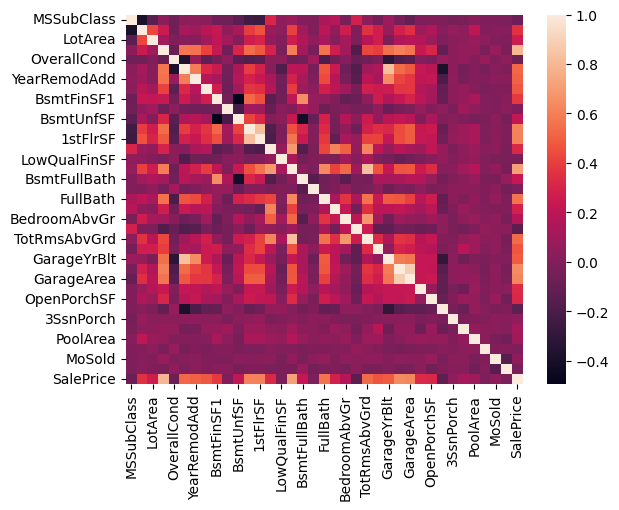

In [11]:
sns.heatmap(df[numerical].corr())

## 1. (Linear) Regression

### Задача регресії
$
Y = \mathbb{R}
$

### Лінейна регресія з 1 фічою

$
\hat{y} = \beta_0 + \beta_1 x
$

In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

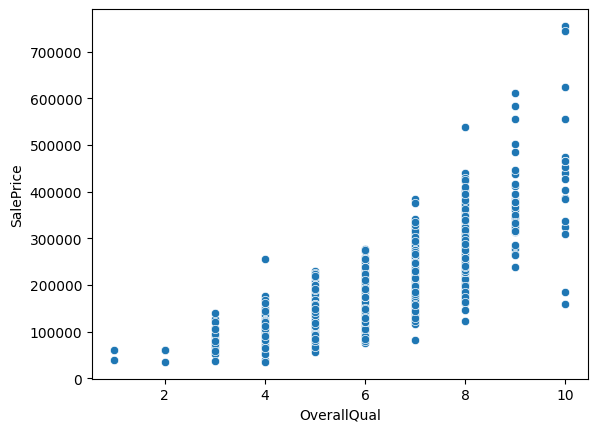

In [15]:
sns.scatterplot(df, x='OverallQual', y='SalePrice')

In [16]:
group = df.groupby('OverallQual')['SalePrice'].mean()
group

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

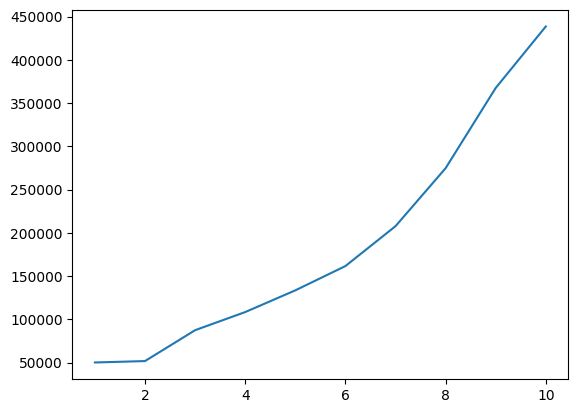

In [37]:
plt.plot(group)

In [17]:
X = df['OverallQual']
y = df['SalePrice']

In [30]:
B1 = 40000
B0 = 50000 - B1

y_hat = B0 + B1 * X

In [31]:
df['pred'] = y_hat

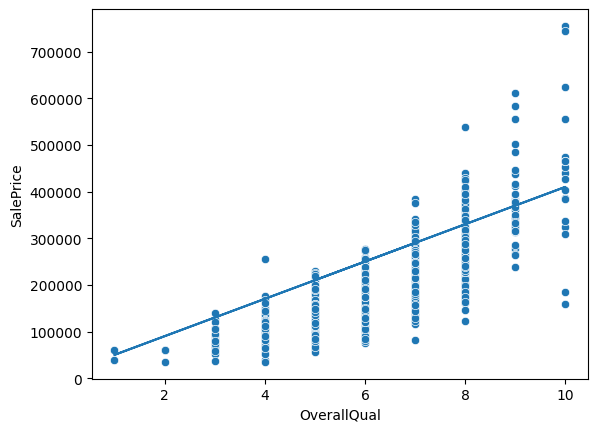

In [32]:
sns.scatterplot(df, x='OverallQual', y='SalePrice')
plt.plot(df['OverallQual'], df['pred'])

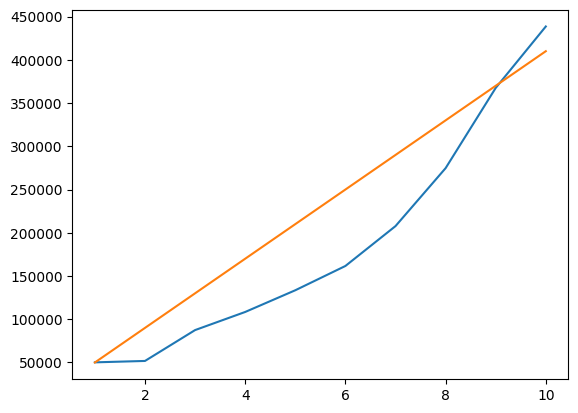

In [33]:
plt.plot(group)
plt.plot(df.groupby('OverallQual')['pred'].mean())

## 2. Model evaluation

### 2.1. Loss function and model training
1. **Machine learning training:**

$$\arg \min_{\theta} L(\theta)$$

2. **Predictions/inference:**

$$\mathbf{f}(\mathbf{X}; \boldsymbol{\theta}) = \hat{y}$$

3. **Loss function:**

$$L(\mathbf{y}, \hat{y})$$

4. Linear regression $d$ features case

$$f(X, W) = \sum_{j=1}^{d+1} w_j x^j = \langle \mathbf{w}, \mathbf{x} \rangle$$

, де $x^1 = 1$

#### Mean Error
$\hat{y} - y$

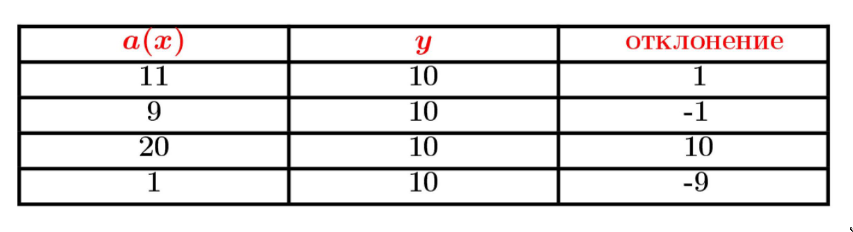

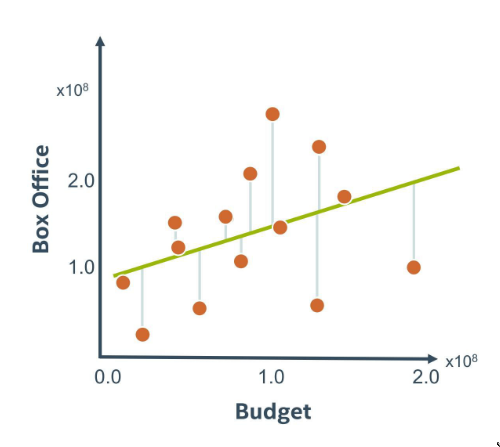

In [91]:
X = np.linspace(df['SalePrice'].min(), df['SalePrice'].max())

In [94]:
y_hats = [(x_i - df['SalePrice']).mean() for x_i in X]

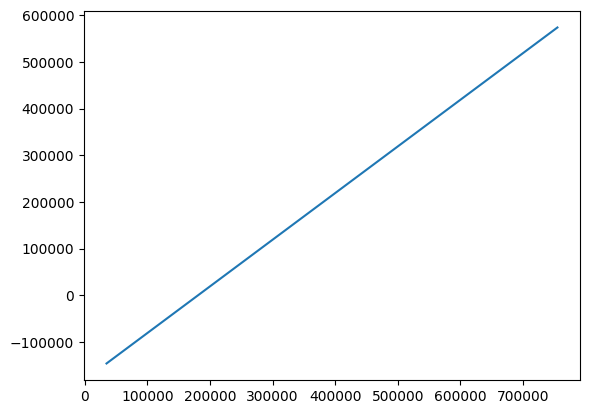

In [95]:
plt.plot(X, y_hats)

#### Mean Absolute Error
$|\hat{y} - y|$

In [152]:
X = np.linspace(df['SalePrice'].min(), df['SalePrice'].max())
y_hats_abs = [((x_i - df['SalePrice']).abs()).mean() for x_i in X]

Text(0.5, 0, 'w0')

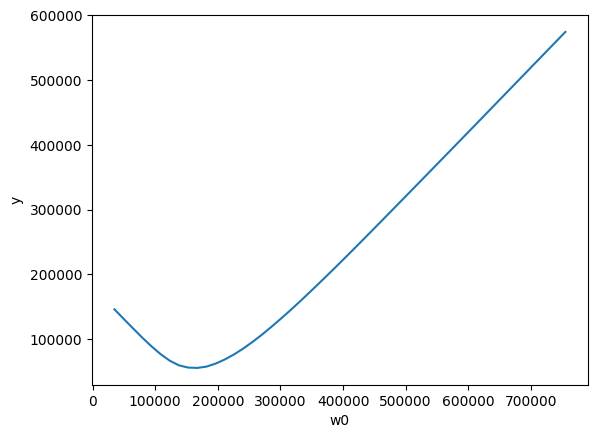

In [154]:
plt.plot(X, y_hats_abs)
plt.ylabel('y')
plt.xlabel('w0')

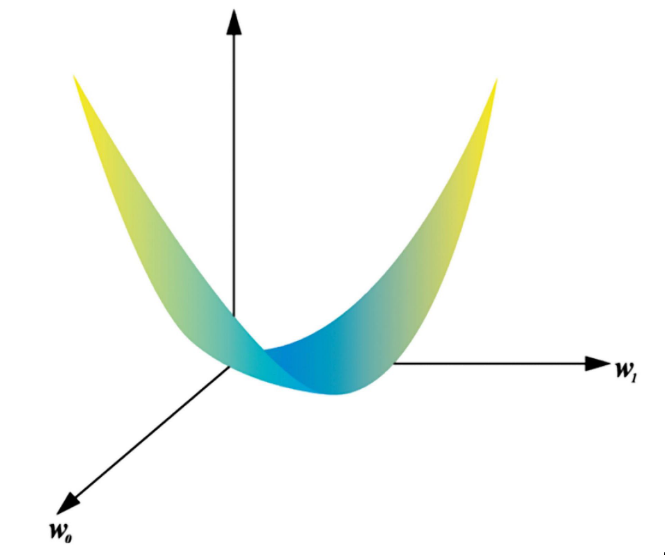

In [34]:
X = np.linspace(-10, 10, num=500)
y_hat = np.abs(X)

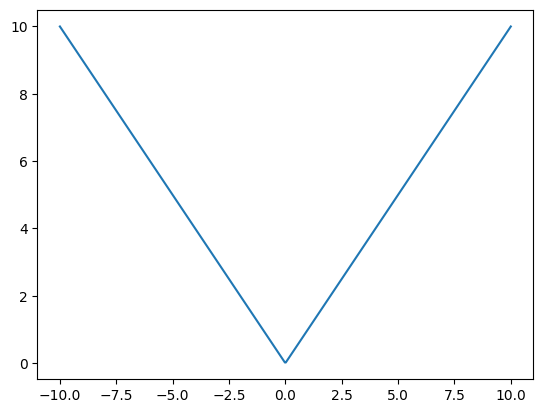

In [35]:
plt.plot(X, y_hat)

**Question**: Яке найоптимальніше значення для $\beta_0$, якщо лосс - MAE, та в нас більше немає ніяких фіч ($\beta_1 ... \beta_d$ відсутні)?

$
\hat{y} = \beta_0
$

$|\hat{y} - y|$

In [54]:
beta_0 = df['SalePrice'].median()#(df['SalePrice'] - df['SalePrice'].min()).mean()

mae = (beta_0 - df['SalePrice']).abs().mean()

In [55]:
(beta_0 - df['SalePrice']).abs().mean()

np.float64(55533.65616438356)

In [51]:
(beta_0 - df['SalePrice']).abs().mean()

np.float64(57434.77027584912)

In [49]:
(beta_0 - df['SalePrice']).abs().mean()

np.float64(57286.51400638019)

In [52]:
df['absolute_error'] = (beta_0 - df['SalePrice']).abs()

In [53]:
df[['absolute_error', 'SalePrice']]

,absolute_error,SalePrice
Id,,
1,27578.80411,208500
2,578.80411,181500
3,42578.80411,223500
4,40921.19589,140000
5,69078.80411,250000
...,...,...
1456,5921.19589,175000
1457,29078.80411,210000
1458,85578.80411,266500


In [43]:
df['SalePrice'].min()

np.int64(34900)

In [42]:
mae

np.float64(57434.77027584912)

In [56]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [57]:
# Dataset generation

def f1(x): return 1 + x*2

def f2(x): return 1 + x*3

X = np.linspace(0, 10, num=50)

y1 = f1(X)
y2 = f2(X)

data_X = np.hstack([X, X]).reshape(-1, 1)
data_y = np.hstack([y1, y2])

Text(0, 0.5, 'target y')

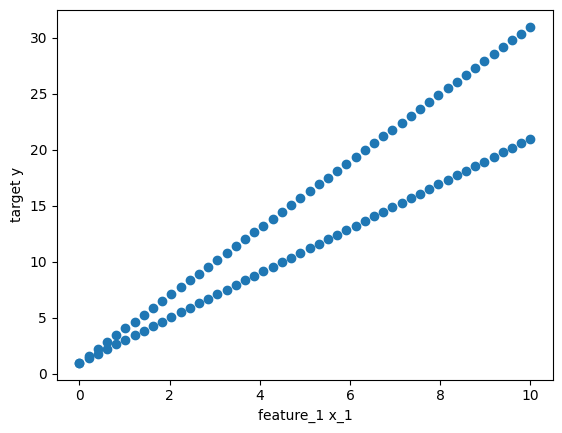

In [58]:
plt.scatter(data_X, data_y)
plt.xlabel('feature_1 x_1')
plt.ylabel('target y')

In [64]:
# MAE Linear Regression
model = SGDRegressor(loss='epsilon_insensitive', penalty=None)

In [65]:
model.fit(data_X, data_y)

SGDRegressor(loss='epsilon_insensitive', penalty=None)

**Question**: Як буде виглядати лінія лінейної регресії, якщо кількість самплів в лініях **не рівна**(у випадку MAE)?

Text(0, 0.5, 'target y')

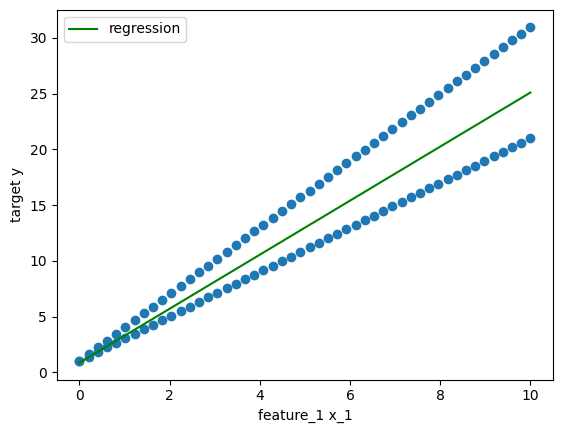

In [66]:
def f3(x): return model.intercept_ + x*model.coef_

X = np.linspace(0, 10, num=50)
plt.scatter(data_X, data_y)
plt.plot(X, f3(X), label='regression', c='green')
plt.legend()

plt.xlabel('feature_1 x_1')
plt.ylabel('target y')

**Question**: Як буде виглядати лінія лінейної регресії, якщо кількість самплів в лініях **рівна**(у випадку MAE)?

In [142]:
model.fit(data_X, data_y)

SGDRegressor(loss='epsilon_insensitive', penalty=None)

Text(0, 0.5, 'target y')

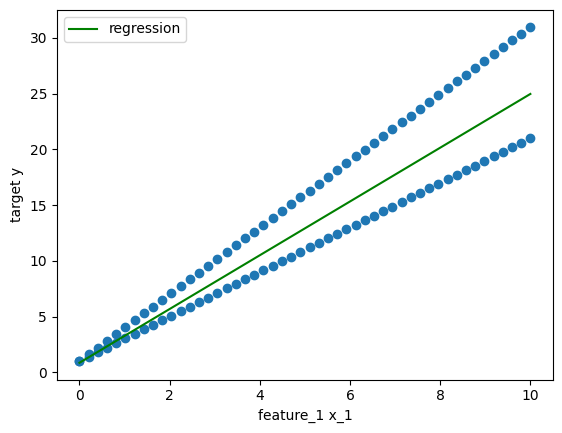

In [159]:
def f3(x): return model.intercept_ + x*model.coef_

X = np.linspace(0, 10, num=50)
plt.scatter(data_X, data_y)
plt.plot(X, f3(X), label='regression', c='green')
plt.legend()

plt.xlabel('feature_1 x_1')
plt.ylabel('target y')

#### Mean Squared Error
$
(\hat{y} - y)^2
$

In [67]:
X = np.linspace(df['SalePrice'].min(), df['SalePrice'].max())
y_hats_squared = [((x_i - df['SalePrice'])**2).mean() for x_i in X]

Text(0.5, 0, 'w0')

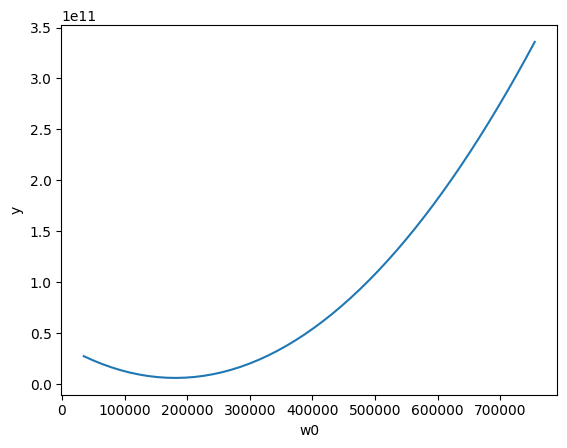

In [68]:
plt.plot(X, y_hats_squared)
plt.ylabel('y')
plt.xlabel('w0')

In [69]:
X = np.linspace(-10, 10, num=500)
y_hat = X**2

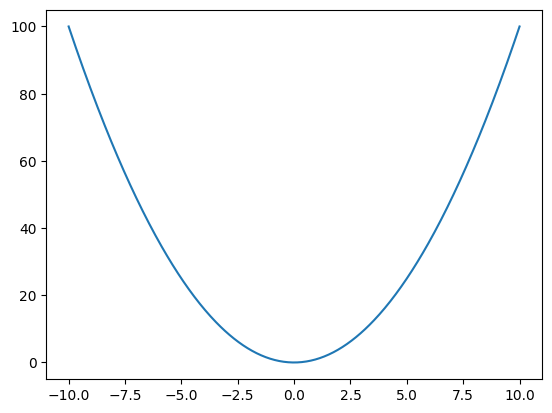

In [70]:
plt.plot(X, y_hat)

**Question**: Яке найоптимальніше значення для $\beta_0$, якщо лосс - **MSE**, та в нас більше немає ніяких фіч ($\beta_1 ... \beta_d$ відсутні)?

In [71]:
model_mse = SGDRegressor(loss='squared_error', penalty=None)

In [77]:
model.fit(data_X, data_y)

SGDRegressor(loss='epsilon_insensitive', penalty=None)

**Question**: Як буде виглядати лінія лінейної регресії(у випадку MSE)?

Text(0, 0.5, 'target y')

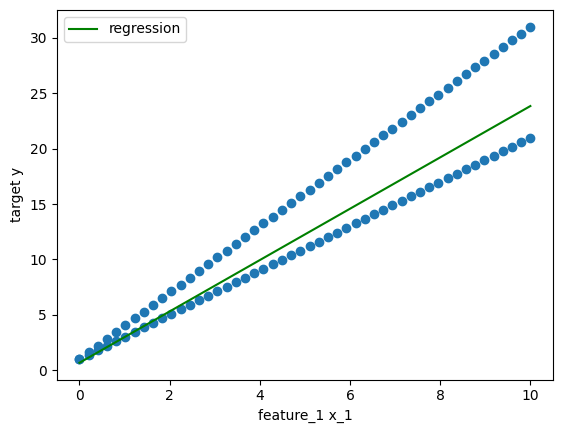

In [76]:
def f3(x): return model.intercept_ + x*model.coef_

X = np.linspace(0, 10, num=50)

plt.scatter(data_X, data_y)
plt.plot(X, f3(X), label='regression', c='green')
plt.legend()

plt.xlabel('feature_1 x_1')
plt.ylabel('target y')

### 3. Gradient descent, Stochastic GD

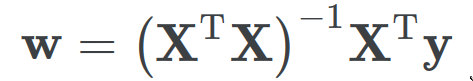